### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Project.toml`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Manifest.toml`


In [2]:
using Dragoon
using Plots

In [3]:
n = 20 # number of discs in the booster

initdist = findpeak1d(20.025e9,n) # initial disc configuration

freqs = genFreqs(20.025e9,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(20.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster

obj = ObjAnalytical

hist = initHist(booster,2*(booster.ndisk^2),freqs,obj);

### Optimizer

In [4]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-12,
                    obj,
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e5),
                    showtrace=true,
                    showevery=10000,
                    unstuckisiter=true,);

Iter: 10000, timestamp: 9 minutes, 19 seconds
Iter finished. Objective value: -13079.381

Iter: 20000, timestamp: 9 minutes, 26 seconds
Iter finished. Objective value: -13125.782

Minimum simplex size reached.
No unstucking tried. Terminating.
Terminated. 20391 Iterations.
Final objective value: -13126.469
Elapsed movement time:  9 minutes, 26 seconds
Summed distance:   0.37
Elapsed computing time: 14 seconds, 842 milliseconds


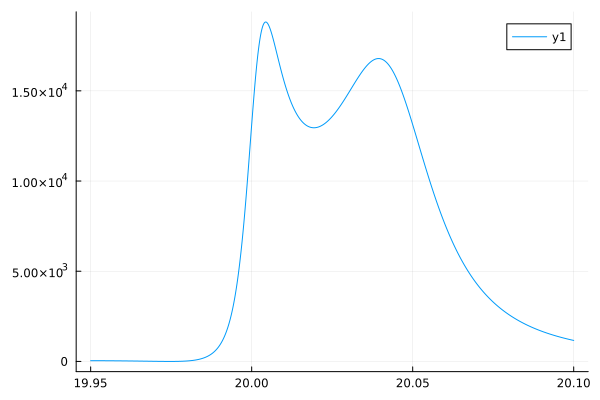

In [5]:
p0 = copy(booster.pos)

plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

In [18]:
freqs1 = genFreqs(20.025e9+50e6,50e6; n=10)

scale = (freqs[1]-(50e6-5e6))/freqs[1]

0.99775

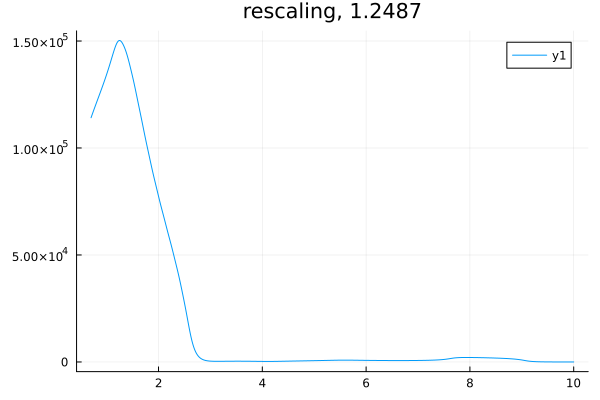

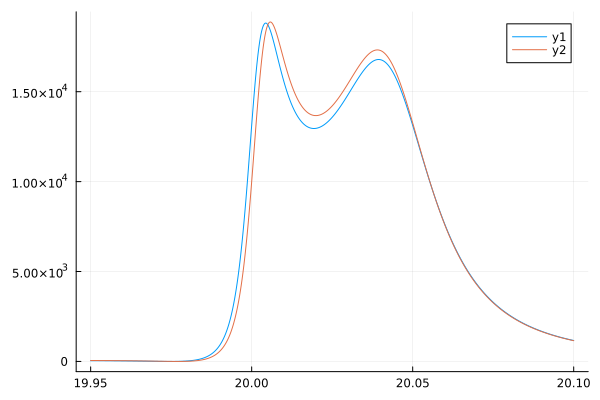

In [20]:
move(booster,p0; additive=false)

p = plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

rescale(booster,hist,freqs1,obj,scale,(0.7,10.0),10000)

plot!(p,freqsplot/1e9,getBoost1d(booster,freqsplot))

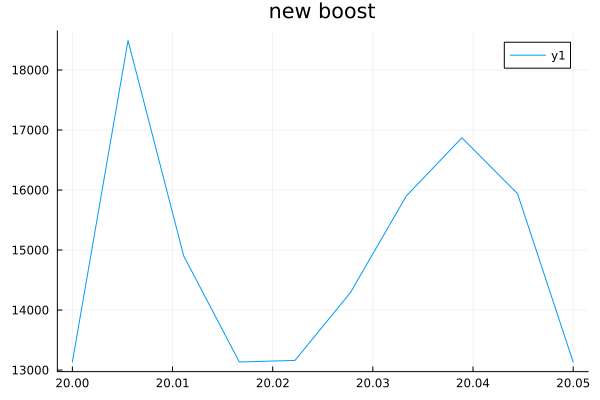

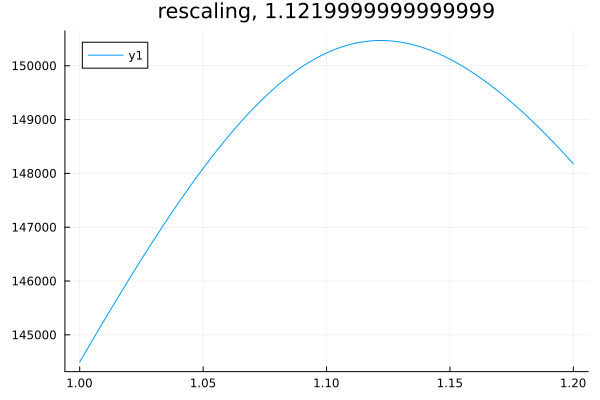

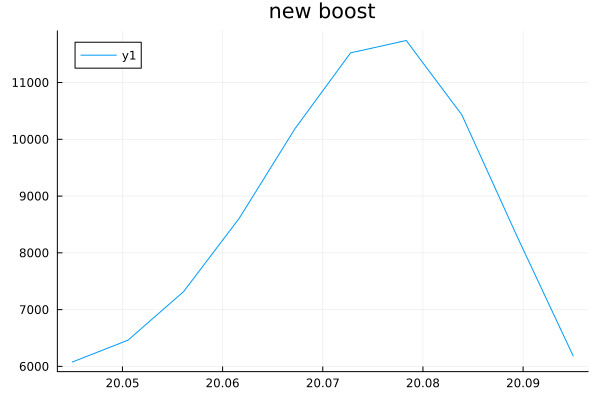

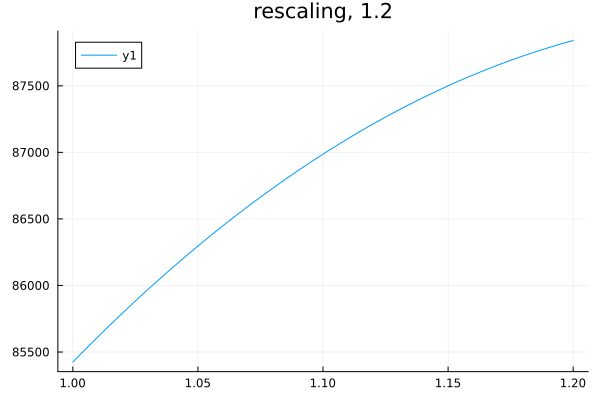

new fmin: 2.0045e10, new fmax: 2.0050555555555557e10, scale = 0.9977550511349463, s = 1.1219999999999999
new fmin: 2.009e10, new fmax: 2.0095555555555557e10, scale = 0.9977600796416127, s = 1.2
new fmin: 2.0135e10, new fmax: 2.0140555555555557e10, scale = 0.997765085671716, s = 1.2


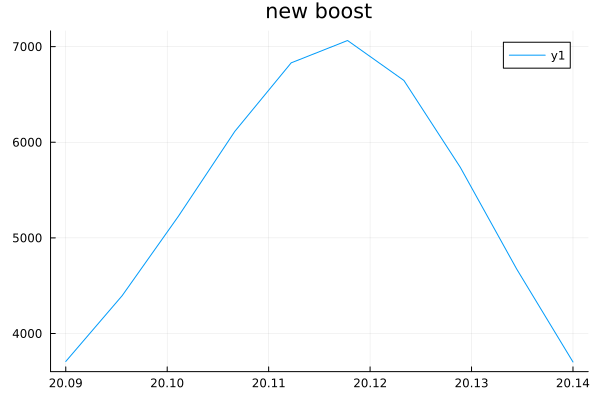

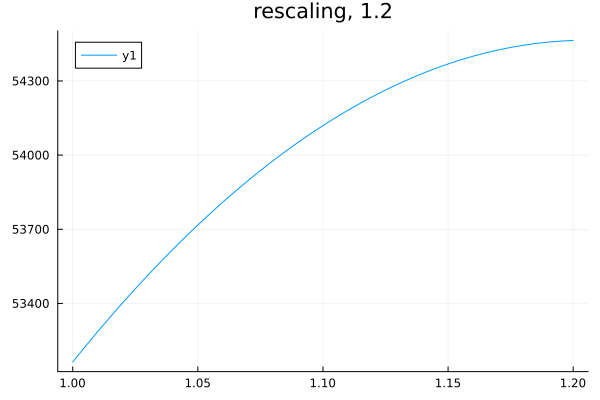

(Any[0.9977550511349463, 0.9977600796416127, 0.997765085671716], Any[1.1219999999999999, 1.2, 1.2])

In [8]:
move(booster,p0; additive=false)

dragoon(booster,hist,50e6,5e6,
        obj,UnstuckExpand(2,12_000);
        fmin=20e9,fmax=20.1e9,nfreqs=10,
        scalerange=(1.0,1.2),scalesteps=1000)